In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import scipy.optimize as op
# import emcee

In [170]:
% matplotlib inline

In [215]:
### Define parameters and datasets
m_true = -0.9594
b_true = 4.294
f_true = 0.534

### Define x values and the linear equation with above given parameters
N = 50
x = np.sort(10*np.random.rand(N))
y = m_true * x + b_true
u = m_true * x + b_true

### Define error and randomly select variation in data points
yerr = 0.1 + 0.5 * np.random.rand(N)
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [236]:
### Define functions for the maximum likelihood calculation
def max_like(theta, x, y, yerr):
    m, b, lnf = theta
    linear_model = m * x + b
    inverse_s_sqrd = 1. / (yerr**2 + (linear_model**2) * np.exp(2*lnf))
    return (-0.5) * (np.sum(((y - linear_model)**2) * inverse_s_sqrd - np.log(inverse_s_sqrd)))

### Define parameters for max likelihood plot 
nll = lambda *args: -max_like(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args = (x, y, yerr))
m_ml, b_ml, f_ml = result["x"]
linn = m_ml * x + b_ml

### Define parameters and linear function for data by linear least squares argument 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

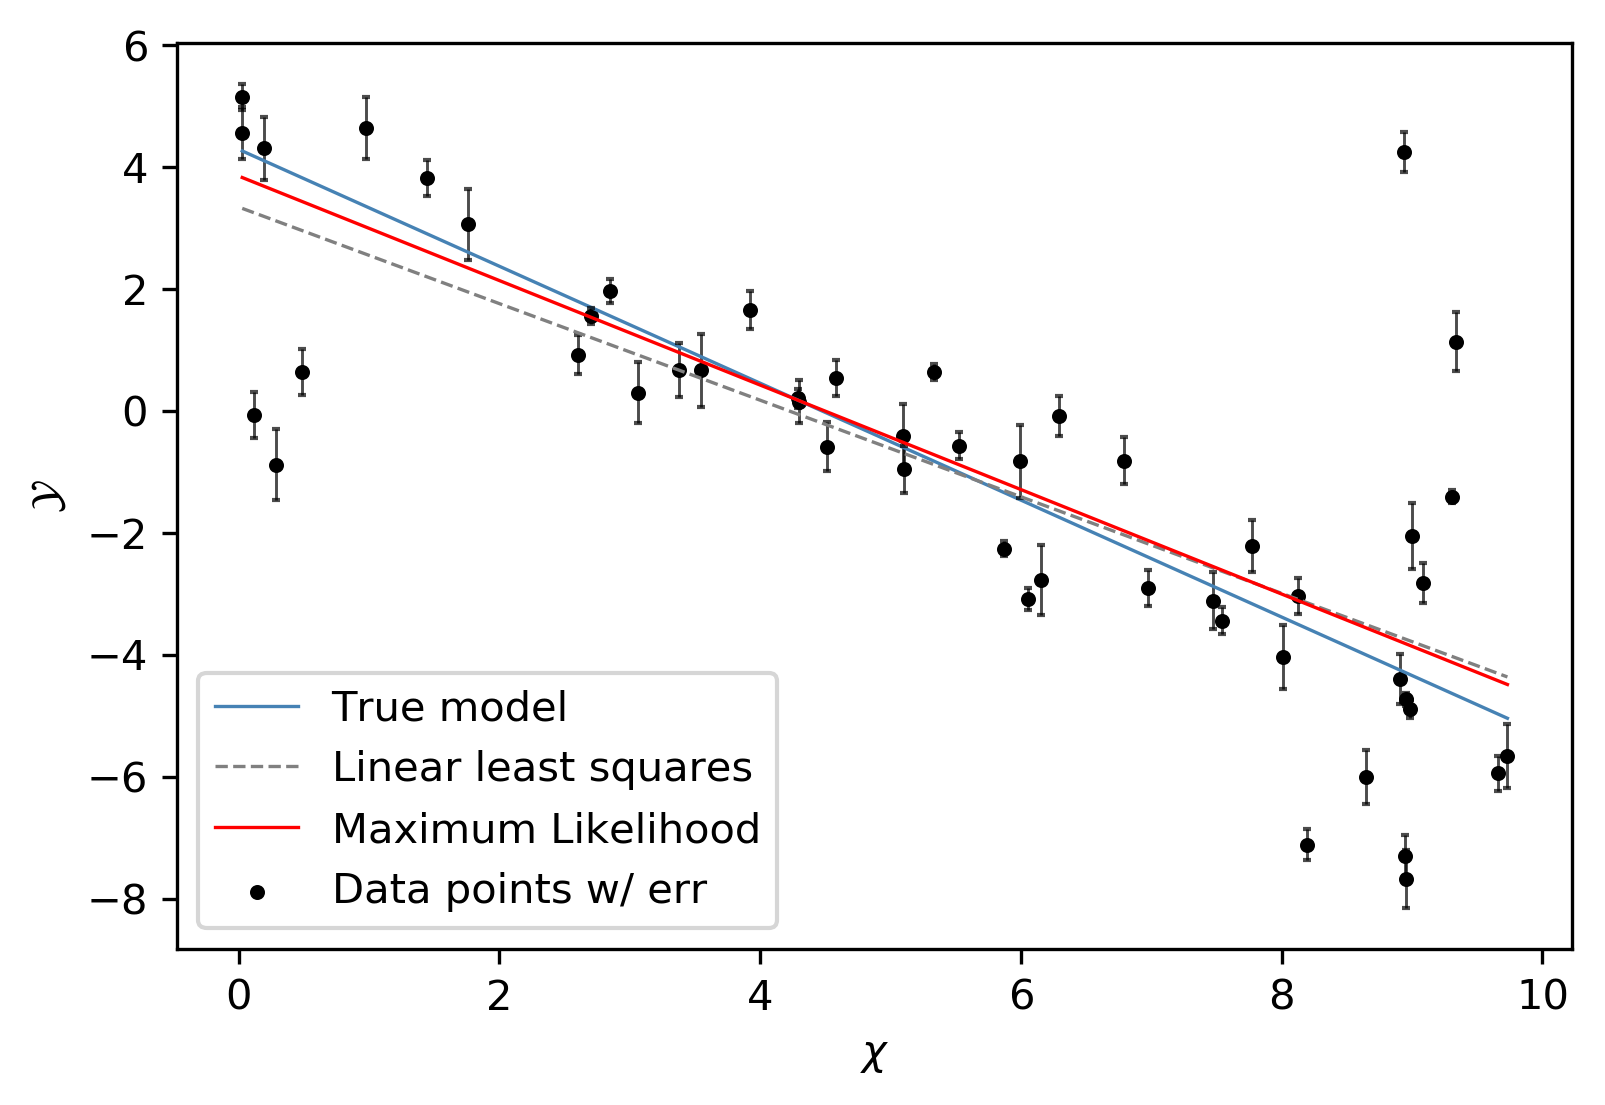

In [237]:
### Plot a line with above arguments
plt.plot(x,u, linewidth = .8, color = 'steelblue', label = 'True model')

### Plot data with errorbars using random values from above
plt.scatter(x, y, marker = '.', linewidth = .6, color = 'black', label = 'Data points w/ err ')
plt.errorbar(x,y, yerr = yerr, fmt = 'none', capsize =1, linewidth = .7, color = 'black', alpha = .7)

### Plot a line using linear least squares argument
plt.plot(x, line, linewidth = .8, color = 'grey', linestyle = '--', label = 'Linear least squares' )

### Plot maximum likelihood
plt.plot(x, linn, linewidth = .8, color = 'r', label = 'Maximum Likelihood')

### Graphics
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\mathcal{Y}$')

plt.legend()

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [239]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]



In [241]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x, y, yerr))
sampler.run_mcmc(pos, 500)

/Users/markpoe/astroml_miniconda3/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/markpoe/astroml_miniconda3/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


(array([[-0.85735475,  3.85511496, -0.25736529],
        [-0.85743495,  3.85510027, -0.25727872],
        [-0.85729369,  3.8552167 , -0.2571795 ],
        [-0.85733578,  3.85519406, -0.25722395],
        [-0.85741569,  3.85532624, -0.25729661],
        [-0.8574064 ,  3.8551943 , -0.25720882],
        [-0.85737291,  3.85532205, -0.25725928],
        [-0.85721144,  3.85528349, -0.25722915],
        [-0.85728246,  3.85526673, -0.25714913],
        [-0.85728855,  3.85518845, -0.25710352],
        [-0.85741489,  3.85523751, -0.25736483],
        [-0.8573197 ,  3.85521008, -0.25728795],
        [-0.8573813 ,  3.85516063, -0.25726074],
        [-0.85752992,  3.85528874, -0.25734965],
        [-0.85735857,  3.85504433, -0.25734115],
        [-0.85733951,  3.85503958, -0.25719264],
        [-0.85740176,  3.85518531, -0.2572674 ],
        [-0.85723663,  3.85522187, -0.25708236],
        [-0.85740094,  3.85495907, -0.25724031],
        [-0.85727619,  3.85511967, -0.25709758],
        [-0.85739215

In [246]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [249]:
# import corner

ModuleNotFoundError: No module named 'corner'

In [184]:
xl = np.array([0,10])
for m, b, lng in sample[np.random.randint(len(samples), size = 100)]


3.5219926099673056 -0.8073584577794434
0.08010611512113305
-0.8240740844589549 1.9588931603182299e-13


In [194]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A )))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))


print (b_ls, m_ls)
print ('\n', cov)
print ('\n', C)
print ('\n\n', A)

4.619435192983227 -0.9533155243389717

 [[ 0.00425114 -0.00064745]
 [-0.00064745  0.00013569]]

 [[0.2181681  0.         0.         ... 0.         0.         0.        ]
 [0.         0.02739353 0.         ... 0.         0.         0.        ]
 [0.         0.         0.28075474 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.22795979 0.         0.        ]
 [0.         0.         0.         ... 0.         0.04260378 0.        ]
 [0.         0.         0.         ... 0.         0.         0.03998068]]


 [[1.         0.37491291]
 [1.         0.78157066]
 [1.         0.79867292]
 [1.         0.96522095]
 [1.         1.10419695]
 [1.         1.11466258]
 [1.         1.1343723 ]
 [1.         1.17920212]
 [1.         1.6269038 ]
 [1.         1.80194024]
 [1.         1.90058052]
 [1.         1.91216467]
 [1.         2.01978159]
 [1.         2.12556704]
 [1.         2.17612921]
 [1.         2.19177315]
 [1.         2.25857395]
 [1.         2.56919068]
 [1.  